## Problem 1 (Principal component analysis)

(a)
單位的不同（billions or millions）便會造成彼此資料變異量不同，假如是相差20億，在boss那邊僅相差2單位，而如果是Joe的話卻有2000單位的差距，彼此資料分布的標準差／變異數變相差很大

(b) 兩者應先在進行數據分析之前統一單位，或是將資料標準化

## Problem 2 (Principal component analysis)

見HW2.pdf

## Problem 3 (Principal component analysis)

In [15]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [16]:
def show_face(face):
    face = face.reshape(28, 20)
    plt.imshow(face, cmap='gray')
    plt.show()

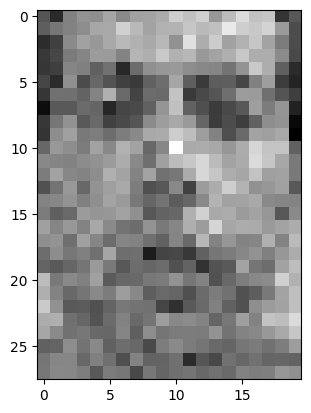

In [17]:
mat = scipy.io.loadmat('04HW2_noisy.mat')
totla_face = np.array(mat['X'])
face10 = totla_face[:, 10]
show_face(face10)

In [19]:
pca = PCA(n_components=100, copy=True)
new_x = pca.fit_transform(totla_face)

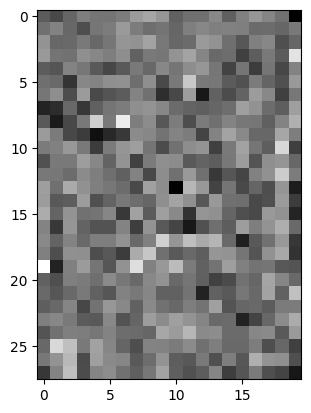

In [21]:
show_face(new_x[:,50])